In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Kütüphaneleri İçeri aktardım

In [ ]:
df = pd.read_csv("/content/fifa_players.csv")
#Dosyayı okumak için kütüphaneme dosya konumunu verdim

In [ ]:
df.head()


,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


GÖREV 1 )  3 ülkenin orta yaşlı oyuncularının potansiyelleri 88 in üzerinde olan oyuncuları bul ve bu iyi oyuncuların 3 ülkedeki dağılımını daire grafiğinde göster

In [ ]:
filt = (df["nationality"] == "Argentina" & df["age"] > "30" & df["potential"] > "88" )

In [ ]:
arjantin_prime= (df["nationality"] == "Argentina") & (df["age"].astype(int) > 25) & (df["potential"].astype(int) > 88)
Arjantin = df.loc[arjantin_prime, ["name", "age", "potential"]]
Arjantin

,name,age,potential
0,L. Messi,31,94
7,S. Agüero,30,89
31,M. Icardi,26,90


In [ ]:
brazil_prime = (df["nationality"] == "Brazil") & (df["age"].astype(int) > 25) & (df["potential"].astype(int) > 88)
Brezilya = df.loc[brazil_prime, ["name", "age", "potential"]]
Brezilya

,name,age,potential
30,Casemiro,27,89
17918,Alisson,26,91
17928,Coutinho,26,89
17943,Neymar Jr,27,92


In [ ]:
france_prime = (df["nationality"] == "France") & (df["age"].astype(int) > 25) & (df["potential"].astype(int) > 88)
France = df.loc[france_prime, ["name", "age", "potential"]]
France

,name,age,potential
13,A. Griezmann,27,90
17929,N. Kanté,27,90


In [ ]:
print(France.shape[0])
print(Brezilya.shape[0])
print(Arjantin.shape[0])

F = France.shape[0]
B = Brezilya.shape[0]
A = Arjantin.shape[0]


t=F+B+A
oran = 360/t
f = F*oran
b = B*oran
a = A*oran
oran

2
4
3


40.0

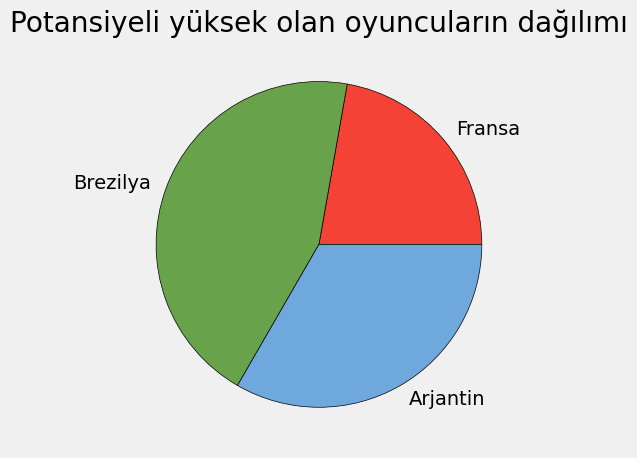

In [ ]:
slices=[f,b,a]
labels=["Fransa","Brezilya","Arjantin"]
colors=["#f44336","#68A24B","#6fa8dc",]

plt.pie(slices,labels=labels,wedgeprops={"edgecolor":"black"},colors=colors)

plt.title("Potansiyeli yüksek olan oyuncuların dağılımı")
plt.tight_layout()
plt.show()

Yaşlara göre ratinglerin artışını gözlemleyelim

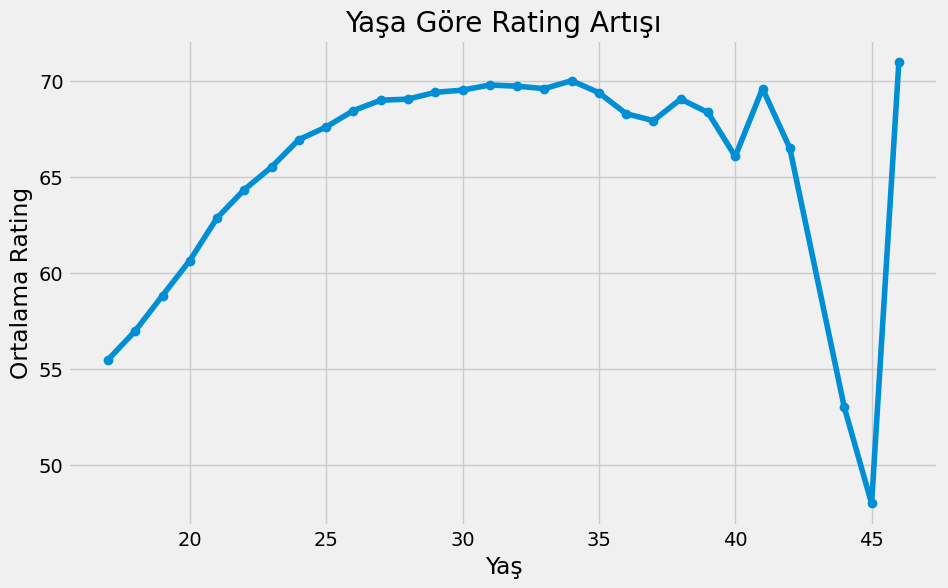

In [ ]:
age_ratings = df.groupby('age')['overall_rating'].mean()
#üstteki kodu columların ortalamasını bulmak için internette buldum

plt.figure(figsize=(10, 6))
plt.plot(age_ratings.index, age_ratings.values, marker='o', linestyle='-')


plt.title('Yaşa Göre Rating Artışı')
plt.xlabel('Yaş')
plt.ylabel('Ortalama Rating')
plt.grid(True)
plt.show()

Genç yıldızlara yatırım yapmak isteyenler için liste



In [ ]:
genç_yıldız_adayları =(df['age'] < 20) & (df['potential'] > 80)
gençler = df.loc[genç_yıldız_adayları,["name",'age','potential']]
gençler

,name,age,potential
191,Vinícius Júnior,18,92
341,João Félix,19,89
500,P. Foden,18,90
509,J. Kluivert,19,86
596,Rafael Leão,19,86
...,...,...,...
16951,D. Zagadou,19,85
16969,I. Konaté,19,84
17555,J. Sancho,18,91
17715,K. Havertz,19,90


Bir takıma Uzaktan şutları iyi olan ve uzun süre kendi takımlarında kabilecek genç bir oyuncu lazım bunun için bir filtreleme yapalım

In [ ]:
Aranan = (df['age'] < 20) & (df['long_shots'] > 75)
aranan = df.loc[Aranan,["name",'long_shots','age']]
aranan

,name,long_shots,age
509,J. Kluivert,76,19
988,M. Cuisance,78,19
16459,G. Chakvetadze,76,19


Bir takıma forvet oyuncusu ve Kafa atabilecek uzun bir Forvet lazım bunun için bir filtre lazım

In [ ]:
Kafacı = (df['positions'].str.contains('ST')) & (df['heading_accuracy'] > 80 & (df['height_cm']>170))
hedef = df.loc[Kafacı, ["name","height_cm", "heading_accuracy", "positions"]]
hedef

,name,height_cm,heading_accuracy,positions
0,L. Messi,170.18,70,"CF,RW,ST"
3,L. Insigne,162.56,56,"LW,ST"
6,K. Mbappé,152.40,77,"RW,ST,RM"
7,S. Agüero,172.72,77,ST
9,E. Cavani,185.42,89,ST
...,...,...,...,...
17938,L. Suárez,182.88,82,ST
17944,Cristiano Ronaldo,187.96,89,"ST,LW"
17945,J. Serra,193.04,73,ST
17952,A. Al Yami,175.26,55,"ST,LM"
